<a href="https://colab.research.google.com/github/mmeierer/RNN---TensorFlow-vs-PyTorch/blob/main/rnn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series prediction using an RNN with TensorFlow

## 1. Import & Preprocessing

### a) Importing modules

In [1]:
# Load required packages - data handling & plotting
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load required packages - deep learning 
from tensorflow import keras

### b) Importing data

In [2]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
flight_data.shape

(144, 3)

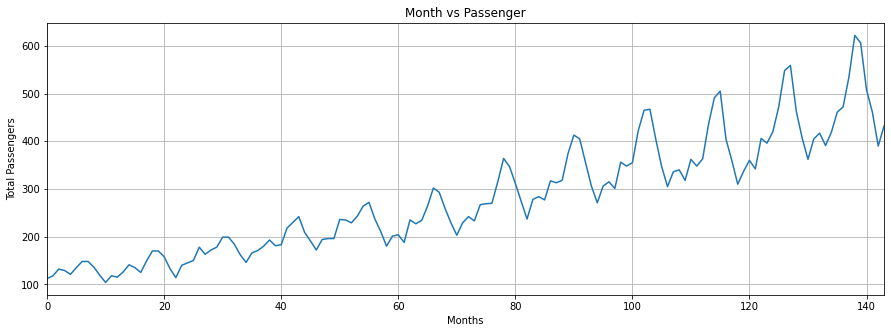

In [4]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(flight_data['passengers'])

In [5]:
flight_data['passengers'][11]

118

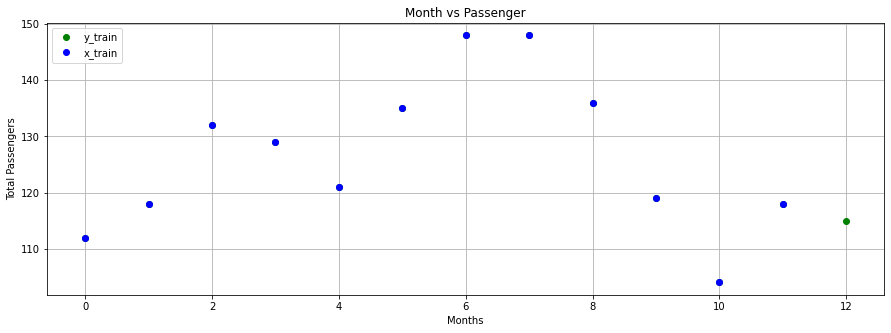

In [6]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.plot(flight_data['passengers'][:13],linestyle="",marker="o", color='green')
plt.plot(np.arange(0, 12, 1), flight_data['passengers'][:12],linestyle="",marker="o", color='blue')
plt.autoscale(axis='x',tight=False)
plt.legend(['y_train', 'x_train'], loc='upper left')
plt.show()

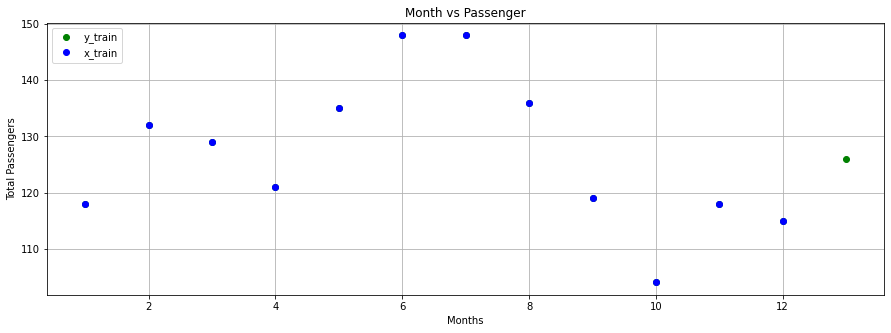

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.plot(flight_data['passengers'][1:14],linestyle="",marker="o", color='green')
plt.plot(np.arange(1, 13, 1), flight_data['passengers'][1:13],linestyle="",marker="o", color='blue')
plt.autoscale(axis='x',tight=False)
plt.legend(['y_train', 'x_train'], loc='upper left')
plt.show()

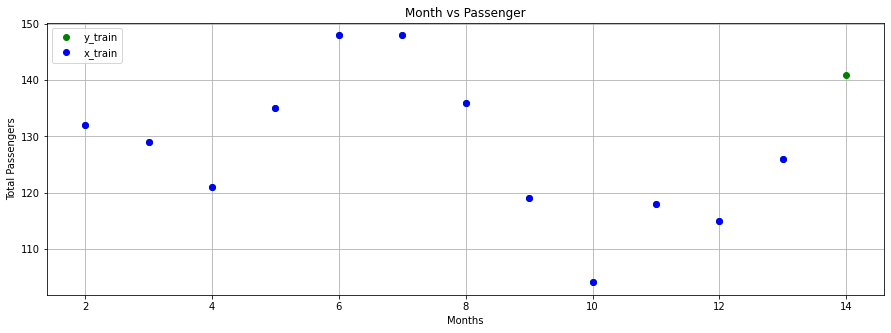

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.plot(flight_data['passengers'][2:15],linestyle="",marker="o", color='green')
plt.plot(np.arange(2, 14, 1), flight_data['passengers'][2:14],linestyle="",marker="o", color='blue')
plt.autoscale(axis='x',tight=False)
plt.legend(['y_train', 'x_train'], loc='upper left')
plt.show()

In [9]:
data = flight_data['passengers']

In [10]:
test_size = 12

x_train = data[:-test_size].values.astype(np.float32)
x_test = data[-test_size:].values.astype(np.float32)

In [11]:
x_train.shape

(132,)

In [12]:
x_test.shape

(12,)

### c) Data preparation

In [13]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train = scaler.fit_transform(x_train.reshape(-1, 1))

In [14]:
x_train.shape

(132, 1)

## 2. Model specific data preparation

### a) Load the data

In [15]:
x_train_tf = tf.squeeze(tf.convert_to_tensor(x_train))

In [16]:
x_train_tf.shape

TensorShape([132])

In [17]:
def create_sequences(input_data, window=12):
    seq = []
    L = len(input_data)
    for i in range(L-window):
        train_seq = input_data[i:i+window]
        train_label = input_data[i+window:i+window+1]
        seq.append((train_seq, train_label))
    return seq

In [18]:
train_seq_tf = create_sequences(x_train_tf)

In [19]:
len(train_seq_tf)

120

### b) Tensor view of the data

In [20]:
train_seq_tf[0]

(<tf.Tensor: shape=(12,), dtype=float32, numpy=
 array([-0.9648351 , -0.9384615 , -0.876923  , -0.89010984, -0.92527467,
        -0.8637362 , -0.80659336, -0.80659336, -0.8593406 , -0.9340659 ,
        -0.99999994, -0.9384615 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.9516483], dtype=float32)>)

## 3. Model definition

### a) Build the model

In [21]:
initializer_uniform = tf.random_uniform_initializer(
    minval=-1, maxval=1, seed=123)
initializer_recurrent = tf.initializers.Orthogonal(seed=123)
initializer_zeros = tf.zeros_initializer()

In [22]:
model_tf = keras.Sequential([
    keras.layers.LSTM(100, input_shape=(12,1), kernel_initializer = initializer_uniform, recurrent_initializer = initializer_recurrent),
    keras.layers.Dense(1, kernel_initializer = initializer_uniform)
])

### b) Inspect the model

In [23]:
model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### c) Inspect the first LSTM layer

In [24]:
hidden1_tf_ante = model_tf.layers[0]
weights_tf_ante = hidden1_tf_ante.get_weights()
weights_tf_ante[0]

array([[-0.04798412, -0.22223973, -0.9824271 , -0.57410717, -0.79084826,
        -0.6723347 , -0.54534245, -0.14903617,  0.22151732, -0.04990911,
         0.76847243,  0.8567488 , -0.19580126,  0.6683371 , -0.29299927,
        -0.13567281,  0.43682718, -0.5372863 , -0.8050833 ,  0.33245063,
         0.08226037,  0.9955554 ,  0.42286134,  0.5824466 , -0.88201547,
         0.79022574, -0.96988153,  0.8838699 ,  0.7405057 , -0.26739526,
         0.541693  , -0.33356333, -0.5114386 ,  0.28969407, -0.5687852 ,
        -0.9064033 ,  0.55588317,  0.12526917,  0.76767826,  0.9882431 ,
         0.82163215, -0.83939624, -0.1760552 , -0.8733709 ,  0.54416513,
         0.3740089 ,  0.67598724,  0.7747915 , -0.22487664, -0.7704594 ,
         0.11647105,  0.735404  , -0.8178191 ,  0.80086374, -0.596689  ,
         0.43223333,  0.6735773 ,  0.28332973, -0.15904045,  0.38079   ,
        -0.8442614 ,  0.4907596 , -0.25315404,  0.02004218, -0.3033669 ,
        -0.2716992 , -0.11689925, -0.78340054, -0.3

In [25]:
weights_tf_ante[0].shape

(1, 400)

In [26]:
hidden1_tf_ante = model_tf.layers[0]
weights_tf_ante = hidden1_tf_ante.get_weights()
weights_tf_ante[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
weights_tf_ante[2].shape

(400,)

## 4. Loss & Optimizer

In [28]:
optimizer_tf = tf.keras.optimizers.Adam()
loss_fn_tf = tf.keras.losses.MeanSquaredError()

## 5. Training

### a) Training loop

In [29]:
def train_step_tf(model, optimizer, loss_fn, sequence):
  losses = []
  for seq, label in sequence:
    exp_sequence = tf.expand_dims(seq,axis=0)
    exp_sequence = tf.expand_dims(exp_sequence,axis=2)

    with tf.GradientTape() as tape:
      y_pred_tf = model(exp_sequence, training=True)
      loss = loss_fn(label, y_pred_tf)

    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    losses.append(loss)
  return losses

In [30]:
train_loss_tf = []

epochs = 25
for epoch in range(epochs):
  loss = train_step_tf(model_tf, optimizer_tf, loss_fn_tf, train_seq_tf)
  mean_loss_tf = float(tf.reduce_mean(loss))
  train_loss_tf.append(mean_loss_tf)

  template = ("Epoch {}, Loss: {}")
  print(template.format(epoch+1, mean_loss_tf))

Epoch 1, Loss: 0.18082311749458313
Epoch 2, Loss: 0.15266303718090057
Epoch 3, Loss: 0.23133592307567596
Epoch 4, Loss: 0.1412334144115448
Epoch 5, Loss: 0.0696154460310936
Epoch 6, Loss: 0.02725944295525551
Epoch 7, Loss: 0.0573805570602417
Epoch 8, Loss: 0.034781597554683685
Epoch 9, Loss: 0.031799886375665665
Epoch 10, Loss: 0.027966463938355446
Epoch 11, Loss: 0.02516794577240944
Epoch 12, Loss: 0.02294638566672802
Epoch 13, Loss: 0.021120814606547356
Epoch 14, Loss: 0.0196005180478096
Epoch 15, Loss: 0.018361501395702362
Epoch 16, Loss: 0.017418479546904564
Epoch 17, Loss: 0.016806447878479958
Epoch 18, Loss: 0.016565827652812004
Epoch 19, Loss: 0.016729729250073433
Epoch 20, Loss: 0.017333144322037697
Epoch 21, Loss: 0.01835007220506668
Epoch 22, Loss: 0.019862988963723183
Epoch 23, Loss: 0.022545121610164642
Epoch 24, Loss: 0.022833295166492462
Epoch 25, Loss: 0.017010796815156937


### b) Training progress

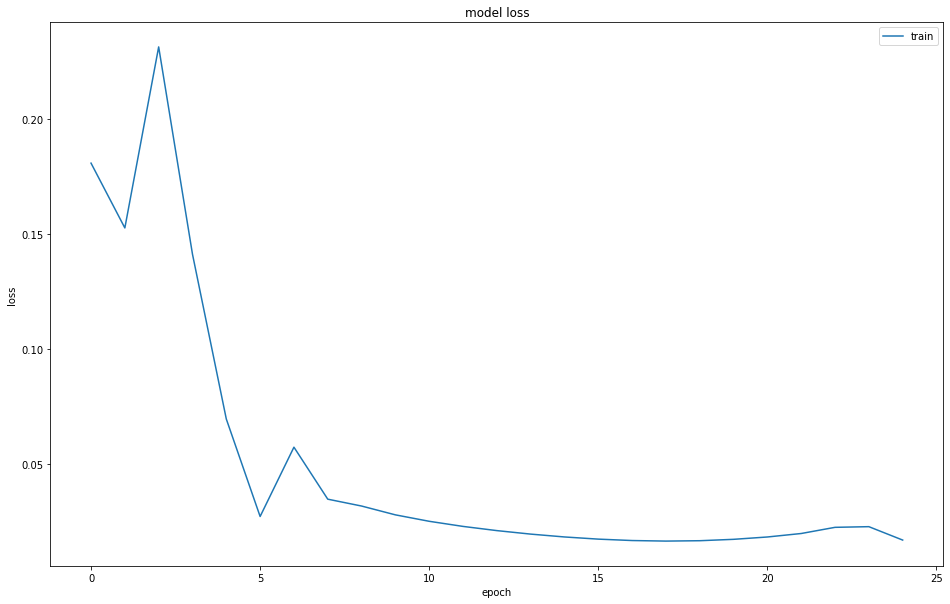

In [31]:
plt.figure(figsize=(16,10))
plt.plot(train_loss_tf)
#plt.plot(test_loss_tf)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### c) Inspect the first hidden layer after training

In [32]:
hidden1_tf_post = model_tf.layers[0]
weights_tf_post = hidden1_tf_post.get_weights()
weights_tf_post[0]

array([[-3.62149216e-02, -2.24000007e-01, -9.71407533e-01,
        -5.77909589e-01, -7.95556009e-01, -6.89025640e-01,
        -5.53150535e-01, -1.39571488e-01,  1.86804131e-01,
        -5.54171689e-02,  7.56214142e-01,  8.55497658e-01,
        -2.31812716e-01,  6.77163601e-01, -2.92909265e-01,
        -1.29289165e-01,  4.28950161e-01, -5.46539545e-01,
        -8.39596272e-01,  3.20298076e-01,  7.86320642e-02,
         9.99237835e-01,  4.28533465e-01,  5.70633888e-01,
        -8.72915626e-01,  7.84282506e-01, -9.80421543e-01,
         8.97935271e-01,  7.36939907e-01, -3.08568597e-01,
         5.48274338e-01, -3.28370899e-01, -4.85846400e-01,
         2.62382269e-01, -5.94688535e-01, -8.74810576e-01,
         5.62036574e-01,  1.09350406e-01,  7.56521940e-01,
         9.72754657e-01,  8.47789764e-01, -8.62629116e-01,
        -1.77568838e-01, -8.71532619e-01,  5.46415746e-01,
         3.98781836e-01,  6.56918764e-01,  7.71356761e-01,
        -2.34844998e-01, -7.67889321e-01,  9.61010605e-0

In [33]:
hidden1_tf_post = model_tf.layers[0]
weights_tf_post = hidden1_tf_post.get_weights()
weights_tf_post[2]

array([-8.11980590e-02, -2.39868611e-02, -5.63059747e-02, -4.80237044e-02,
       -1.21956971e-02, -5.54294772e-02, -3.37608494e-02, -9.15590301e-02,
       -9.39922482e-02, -7.75839761e-02, -4.21859957e-02, -1.46503029e-02,
       -9.09323320e-02, -2.93196496e-02, -7.83752650e-02, -7.91487694e-02,
       -3.88904847e-02, -6.33504540e-02, -3.94613966e-02, -5.13177142e-02,
       -4.38517295e-02, -3.00078504e-02, -3.52010801e-02, -1.50183337e-02,
       -6.05936199e-02, -3.46694477e-02, -8.82116379e-04, -4.73561697e-02,
       -2.81042270e-02,  4.26244773e-02, -5.77410832e-02, -2.50765830e-02,
       -3.81298661e-02, -4.50237915e-02, -6.05408475e-03, -4.40115929e-02,
       -2.84396522e-02, -6.88235983e-02, -9.36466977e-02, -1.18601676e-02,
       -4.65706401e-02, -4.23717909e-02, -3.53377275e-02, -6.66062236e-02,
       -5.77750169e-02, -4.37562503e-02, -4.66649234e-02, -1.32994372e-02,
       -7.07967579e-02, -2.90949550e-02, -4.14395370e-02, -4.21877131e-02,
       -3.78299542e-02, -

## 6. Evaluation

### a) Prediction comparing to the test set

In [34]:
test_inputs_overlap_tf = x_train[-12:].tolist()

In [35]:
test_inputs_overlap_tf

[[0.12527477741241455],
 [0.046153903007507324],
 [0.3274726867675781],
 [0.28351664543151855],
 [0.3890111446380615],
 [0.6175825595855713],
 [0.951648473739624],
 [1.000000238418579],
 [0.5780220031738281],
 [0.3318682909011841],
 [0.13406598567962646],
 [0.32307708263397217]]

In [36]:
for i in range(12):
    x_test_seq_tf = tf.convert_to_tensor(test_inputs_overlap_tf[-12:])
    x_test_seq_tf = tf.expand_dims(x_test_seq_tf,axis=0)
    pred_tf = tf.constant(model_tf(x_test_seq_tf)).numpy()
    test_inputs_overlap_tf.append([pred_tf.item()])

In [37]:
test_inputs_overlap_tf[-12:]

[[0.4993186891078949],
 [0.7795851230621338],
 [1.1664642095565796],
 [1.4866559505462646],
 [1.610286831855774],
 [1.5296121835708618],
 [1.3120981454849243],
 [0.994793713092804],
 [0.6434371471405029],
 [0.4144556522369385],
 [0.38520902395248413],
 [0.5134952068328857]]

In [38]:
overlap_predictions_tf = scaler.inverse_transform(np.array(test_inputs_overlap_tf[-12:]).reshape(-1, 1))
print(overlap_predictions_tf)

[[445.09497495]
 [508.85558572]
 [596.87057382]
 [669.71419152]
 [697.84021572]
 [679.48673408]
 [630.00229271]
 [557.81553768]
 [477.88192263]
 [425.78863496]
 [419.13502733]
 [448.32013258]]


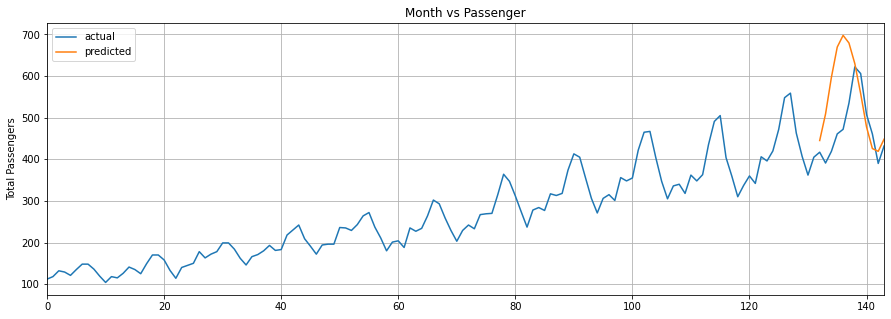

In [39]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(np.arange(132, 144, 1),overlap_predictions_tf)
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

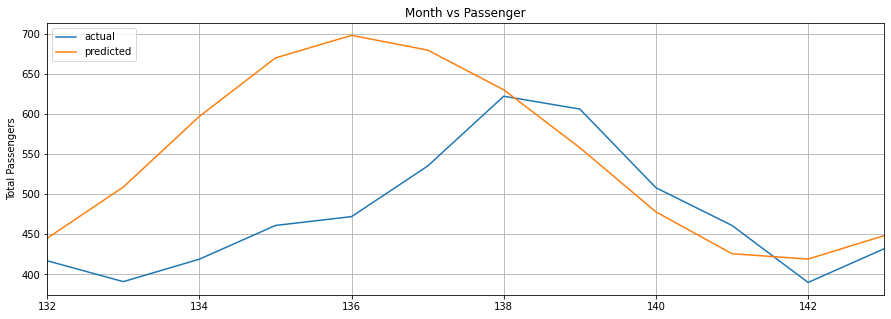

In [40]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'][-12:])
plt.plot(np.arange(132, 144, 1),overlap_predictions_tf)
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

### b) Prediction into the future using the test set

In [41]:
scaler = MinMaxScaler(feature_range=(-1, 1))
x_test_tf = scaler.fit_transform(x_test.reshape(-1, 1))

In [42]:
test_inputs_tf = x_test_tf[-12:].tolist()

In [43]:
test_inputs_tf

[[-0.7672414779663086],
 [-0.9913794994354248],
 [-0.7500002384185791],
 [-0.38793110847473145],
 [-0.2931036949157715],
 [0.25],
 [1.0],
 [0.8620686531066895],
 [0.01724100112915039],
 [-0.38793110847473145],
 [-1.000000238418579],
 [-0.6379311084747314]]

In [44]:
for i in range(12):
    x_test_seq_tf = tf.convert_to_tensor(test_inputs_tf[-12:])
    x_test_seq_tf = tf.expand_dims(x_test_seq_tf,axis=0)
    pred_tf = tf.constant(model_tf(x_test_seq_tf)).numpy()
    test_inputs_tf.append([pred_tf.item()])

In [45]:
test_inputs_tf[-12:]

[[-0.4344428479671478],
 [-0.230558842420578],
 [0.01953166164457798],
 [0.2757662832736969],
 [0.4761544167995453],
 [0.5827304720878601],
 [0.5334532856941223],
 [0.2731383144855499],
 [-0.0943015068769455],
 [-0.28579264879226685],
 [-0.26944008469581604],
 [-0.25707948207855225]]

In [46]:
predictions_tf = scaler.inverse_transform(np.array(test_inputs_tf[-12:]).reshape(-1, 1))
print(predictions_tf)

[[455.60465041]
 [479.25519514]
 [508.26569372]
 [537.98890994]
 [561.23393351]
 [573.59675597]
 [567.88060233]
 [537.68406556]
 [495.06104612]
 [472.84807358]
 [474.74497102]
 [476.17880093]]


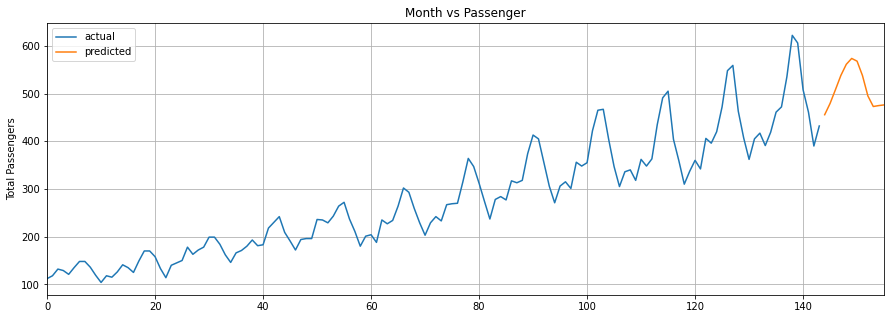

In [47]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(np.arange(144, 156, 1),predictions_tf)
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

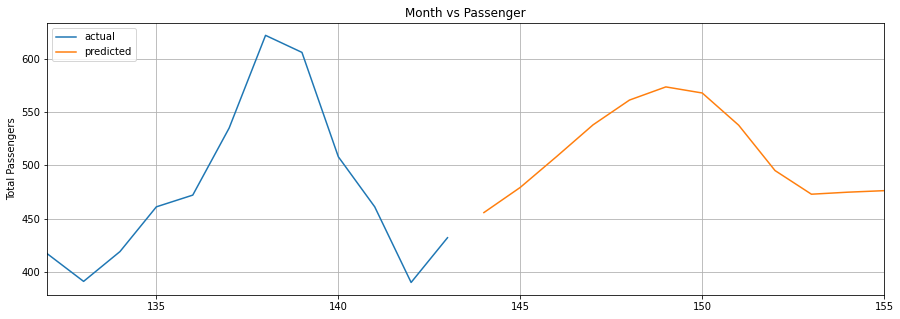

In [48]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'][-12:])
plt.plot(np.arange(144, 156, 1),predictions_tf)
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

## Appendix

In [49]:
class LSTM_TF(tf.keras.Model):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super(LSTM_TF, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = keras.layers.LSTM(hidden_layer_size, 
                                      input_shape=(12, input_size), 
                                      kernel_initializer = initializer_uniform,
                                      recurrent_initializer = initializer_recurrent,
                                      unit_forget_bias = False,
                                      bias_initializer = initializer_zeros,
                                      batch_size = 120,
                                      stateful=True)
        self.lstm.build((1,input_size))
        self.dense = keras.layers.Dense(output_size, 
                                        kernel_initializer=initializer_uniform, 
                                        bias_initializer=initializer_zeros)

    def call(self, inputs, training=False):
        self.init_hidden()
        sequence = tf.expand_dims(inputs,axis=0)
        sequence = tf.expand_dims(sequence,axis=2)
        lstm_out = self.lstm(sequence)
        output = self.dense(lstm_out)
        return output

    def init_hidden(self):
        h0 = np.zeros((1, self.hidden_layer_size))
        c0 = np.zeros((1, self.hidden_layer_size))
        self.lstm.reset_states(states=[h0,c0])

In [50]:
model_tf = LSTM_TF()